# Predicting a Pulsar Star

The dataset was obtained from https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate.

Description
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

Credit goes to Pavan Raj (https://www.kaggle.com/pavanraj159) from where the dataset has been collected. For the purpose of creating a challenge, certain modifications have been done to the dataset.

Original dataset can be acquired from the link Predicting a Pulsar Star (https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star)

Attribute Information:
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

## Objectives

From the title of the project, its obvious that the objective is the correct identification of pulsar stars.

This will be a simple prediction and labelling project, with no statistic calculations involved.

## Libraries

The first step is to load the libraries necessary to view and analyze the data as well as the ones to create the prediction models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import missingno as msno

## Loading and Analysing the Files

There are two `csv` files:
+ `pulsar_data_test.csv`, with the testing data;
+ `pulsar_data_train.csv`, with the training data;

### Test data

In [2]:
test_set = pd.read_csv("pulsar_data_test.csv")
test_set.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


### Train data

In [3]:
train_set = pd.read_csv("pulsar_data_train.csv")
train_set.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


### Missing Data

The missing data will affect the accuracy of the prediction models, so it's necessary to handle those missing values.

In [4]:
def missing(dataset):
    return dataset.isnull().sum(), msno.matrix(dataset.sample(5370))


#### Test set 

( Mean of the integrated profile                     0
  Standard deviation of the integrated profile       0
  Excess kurtosis of the integrated profile        767
  Skewness of the integrated profile                 0
  Mean of the DM-SNR curve                           0
  Standard deviation of the DM-SNR curve           524
  Excess kurtosis of the DM-SNR curve                0
  Skewness of the DM-SNR curve                     244
 target_class                                     5370
 dtype: int64,
 <AxesSubplot:>)

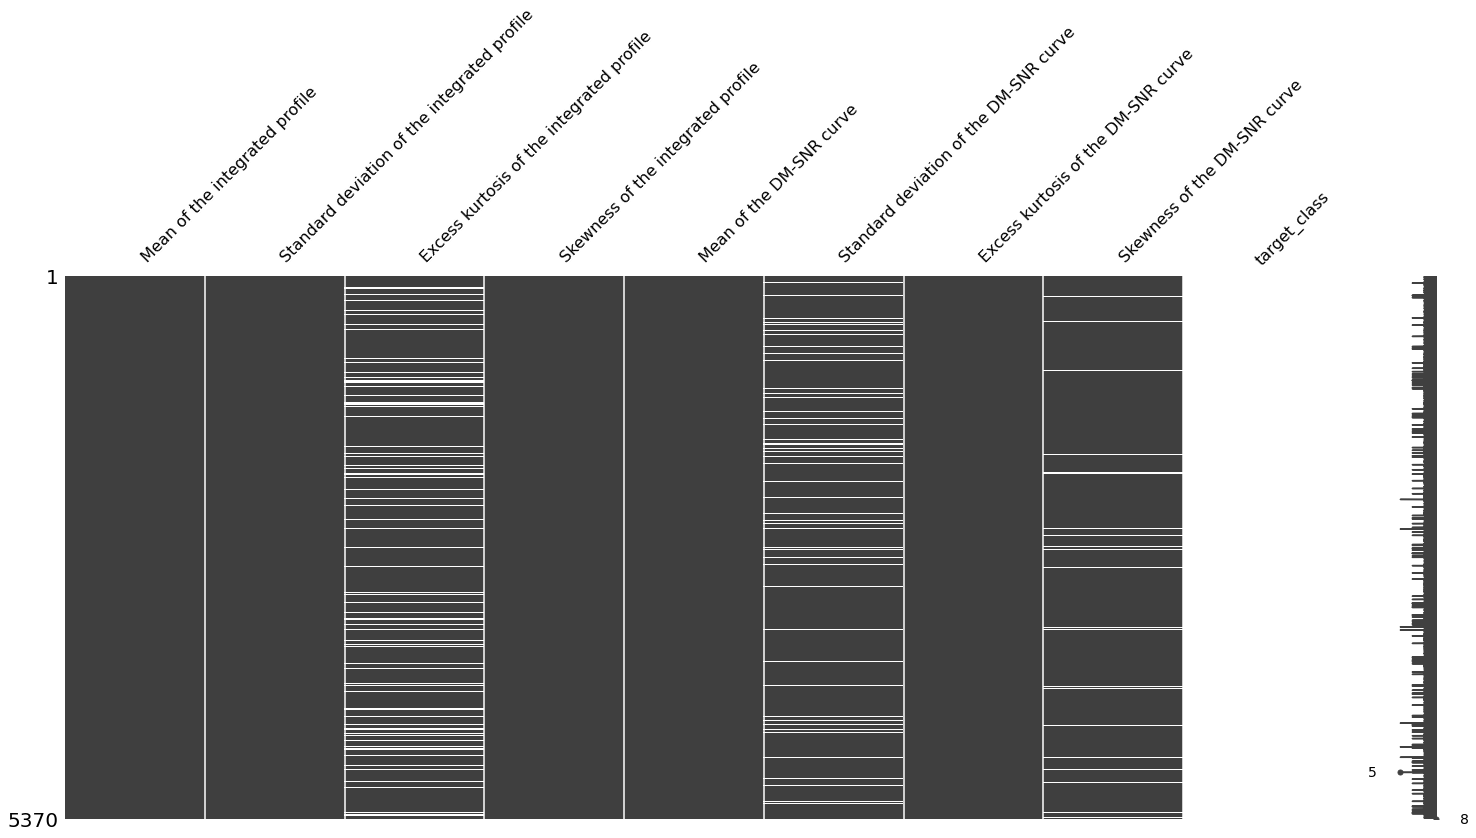

In [5]:
missing(test_set)

There are a lot of missing values in three variables (the fourth is the classifications, wich in this dataset is empty), but accordingly to the graph they cannot be simply removed, or the sample size would be greatly reduced.

#### Train set

( Mean of the integrated profile                     0
  Standard deviation of the integrated profile       0
  Excess kurtosis of the integrated profile       1735
  Skewness of the integrated profile                 0
  Mean of the DM-SNR curve                           0
  Standard deviation of the DM-SNR curve          1178
  Excess kurtosis of the DM-SNR curve                0
  Skewness of the DM-SNR curve                     625
 target_class                                        0
 dtype: int64,
 <AxesSubplot:>)

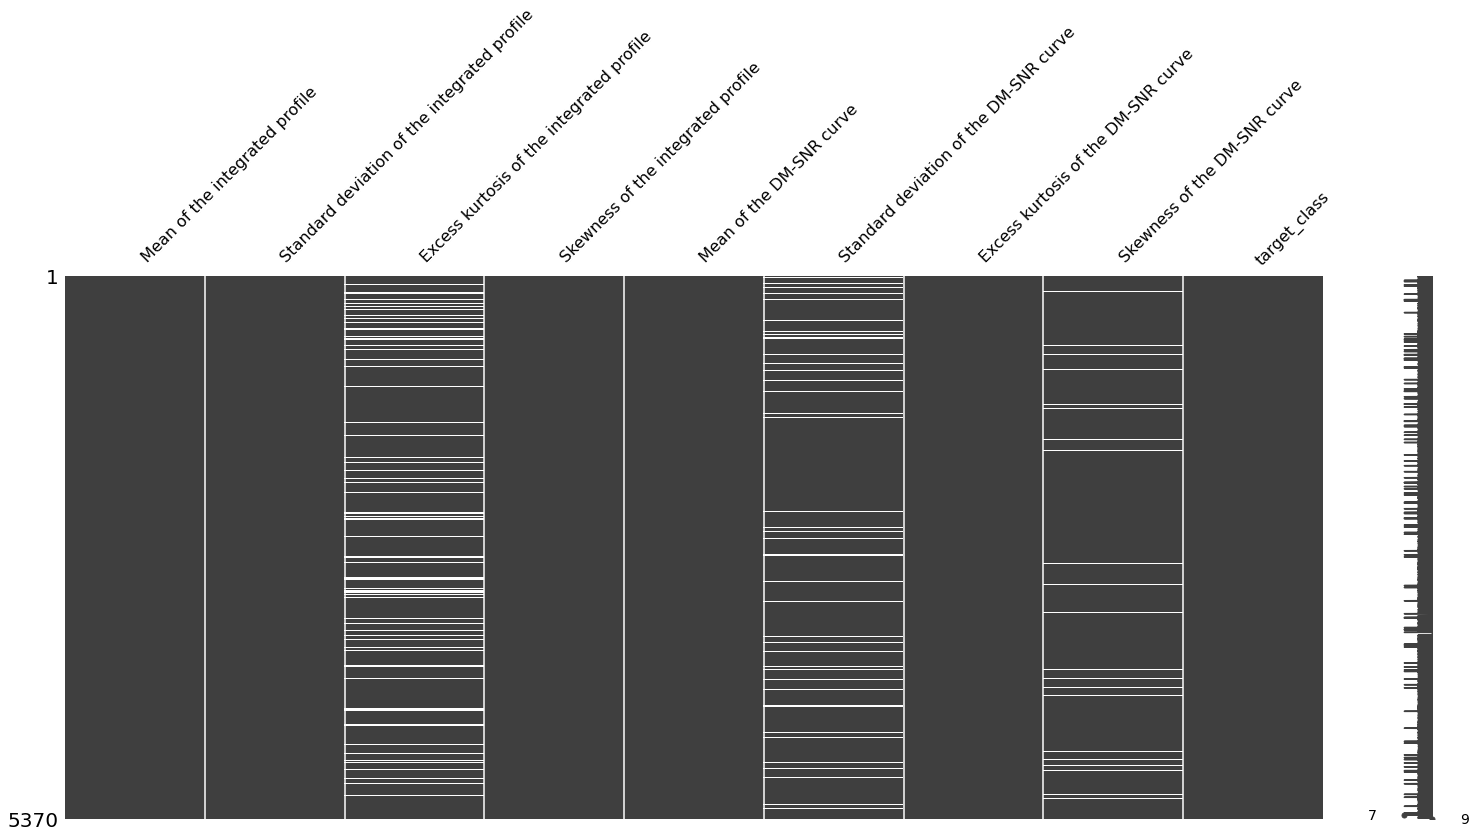

In [6]:
missing(train_set)

In this set there are a lot more missing values compared to the `test_set`.

Now that we have a sense of how the missing values are distributed, and their dimension, it's important to define a method to tackle this issue.

### Data distribution

In order to better understand if all of this variables afect the classification of the stars, two models of machine learning will be implemented: one wich all of the variables enter the equation, and one where only the variables considered relevant come into play. 

To do this first we will need to divide the `train_set` into to two, depending on the target class.

In the `test_set`, since the classification is not defined, the column `target_class` will be eliminated.

In [7]:
# dividing the train_set
not_pulsar = train_set[train_set['target_class'] == 0]
#not_pulsar.head()

pulsar = train_set[train_set['target_class'] == 1]
#pulsar.head()

# eliminating the classification column from test_set
test_set = test_set.drop(["target_class"], axis=1)
#test_set.columns

#### Calculating Statistics

To get a better sense of the data that afect the prediction of pulsar stars, a satistics analysis will be perfomed to get a better sense of the data.

Before checking the influence between variables, its important to see the spread of the data. This will be performed using plots to see the means, medians and standard deviations, and to see if there are a considerable amount of outliers.

The graphs will be:
+ histograms
+ box plots

##### Means, medians and spread

In [8]:
# data spread function
class Spread:
    
    def __init__(self, dataset):
        self.dataset = dataset
    
    def sum_stats(self):
        #Each column mean
        print("Average:")
        print(self.dataset.mean())
        print("\n")

        #Each column median
        print("Median:")
        print(self.dataset.median())
        print("\n")

        #Each column standard deviation
        print("Standard Deviation:")
        print(self.dataset.std())
        print("\n")
    
    #histograms
    def hist(self):
        df = self.dataset
        plt.figure(figsize = (20, 15))
        rows = len(df.columns) / 3
        for i in range(1, len(df.columns)):
            plt.subplot(rows, 3, i)
            plt.hist(df[df.columns[i - 1]])
            plt.title(df.columns[i - 1])
            
    #box plots
    def box(self):
        plt.figure(figsize = (15, 10))
        df = self.dataset.drop(["target_class"], axis=1)
        chart = sns.boxplot(data = df)
        chart.set_xticklabels(chart.get_xticklabels(), rotation = "vertical")
        plt.title("Box Plots")

        
#overlapping histograms
def over_hist(df1, df2):
    plt.figure(figsize = (20, 15))
    for i in range(1, len(df1.columns)):
        plt.subplot(len(df1.columns) / 3, 3, i)
        plt.hist(df1[df1.columns[i - 1]], alpha = 0.5)
        plt.hist(df2[df2.columns[i - 1]], alpha = 0.5)
        plt.title(df1.columns[i - 1])
        plt.legend(["Pulsar star", "Non pulsar star"])

###### Pulsar set

Average:
 Mean of the integrated profile                  56.522990
 Standard deviation of the integrated profile    38.708515
 Excess kurtosis of the integrated profile        3.123432
 Skewness of the integrated profile              15.566358
 Mean of the DM-SNR curve                        49.913590
 Standard deviation of the DM-SNR curve          56.921437
 Excess kurtosis of the DM-SNR curve              2.780529
 Skewness of the DM-SNR curve                    17.939904
target_class                                      1.000000
dtype: float64


Median:
 Mean of the integrated profile                  54.296875
 Standard deviation of the integrated profile    37.534642
 Excess kurtosis of the integrated profile        2.965753
 Skewness of the integrated profile              11.238433
 Mean of the DM-SNR curve                        33.880435
 Standard deviation of the DM-SNR curve          59.795023
 Excess kurtosis of the DM-SNR curve              1.890020
 Skewness of the DM-SN

C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


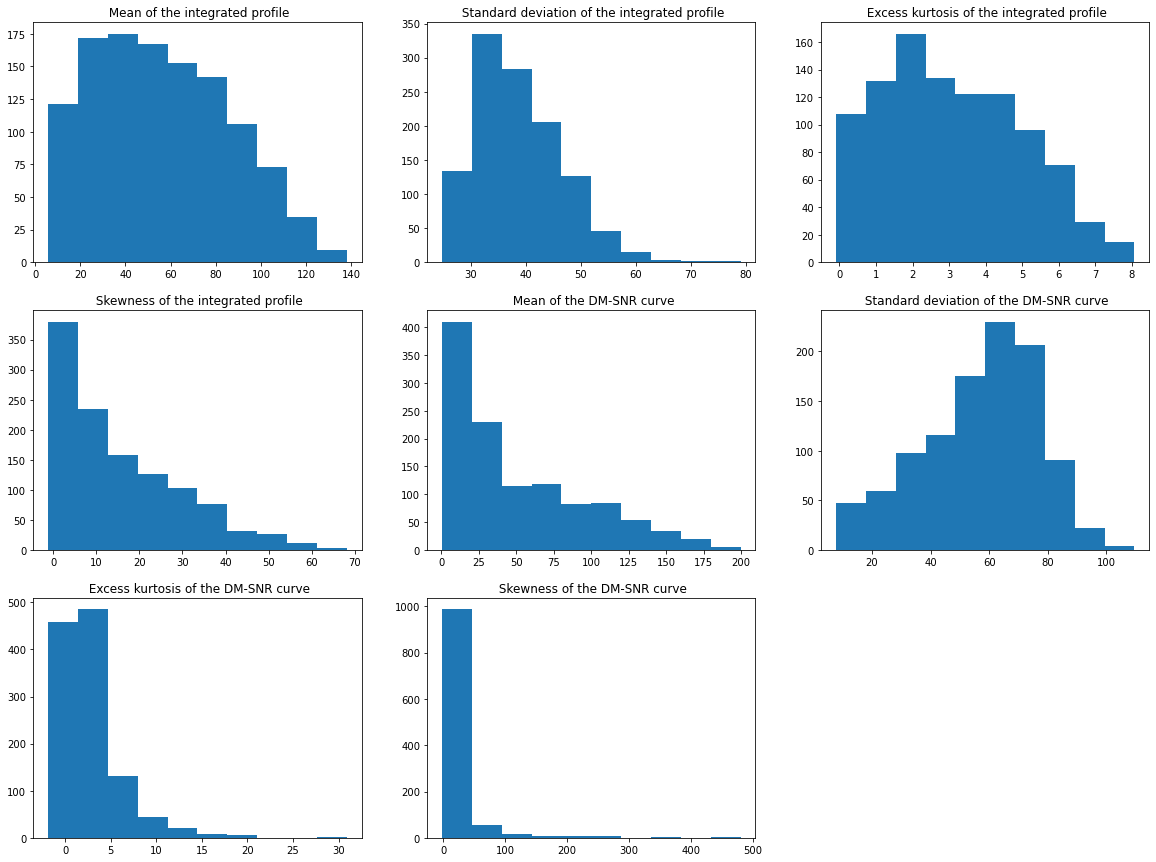

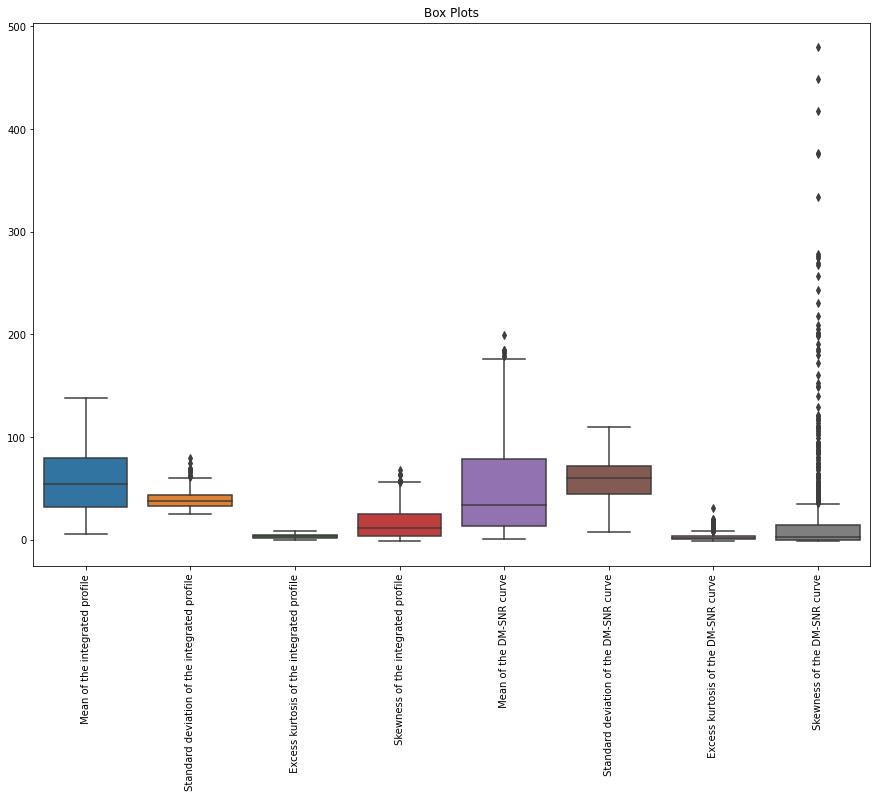

In [9]:
pulsar_stats = Spread(pulsar)
pulsar_stats.sum_stats()
pulsar_stats.hist()
pulsar_stats.box()

###### Non pulsar set

Average:
 Mean of the integrated profile                  116.568016
 Standard deviation of the integrated profile     47.313376
 Excess kurtosis of the integrated profile         0.209956
 Skewness of the integrated profile                0.380851
 Mean of the DM-SNR curve                          8.900132
 Standard deviation of the DM-SNR curve           23.241487
 Excess kurtosis of the DM-SNR curve               8.896352
 Skewness of the DM-SNR curve                    114.363754
target_class                                       0.000000
dtype: float64


Median:
 Mean of the integrated profile                  117.343750
 Standard deviation of the integrated profile     47.460343
 Excess kurtosis of the integrated profile         0.185609
 Skewness of the integrated profile                0.130436
 Mean of the DM-SNR curve                          2.626254
 Standard deviation of the DM-SNR curve           17.570435
 Excess kurtosis of the DM-SNR curve               8.778976
 Skewn

C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


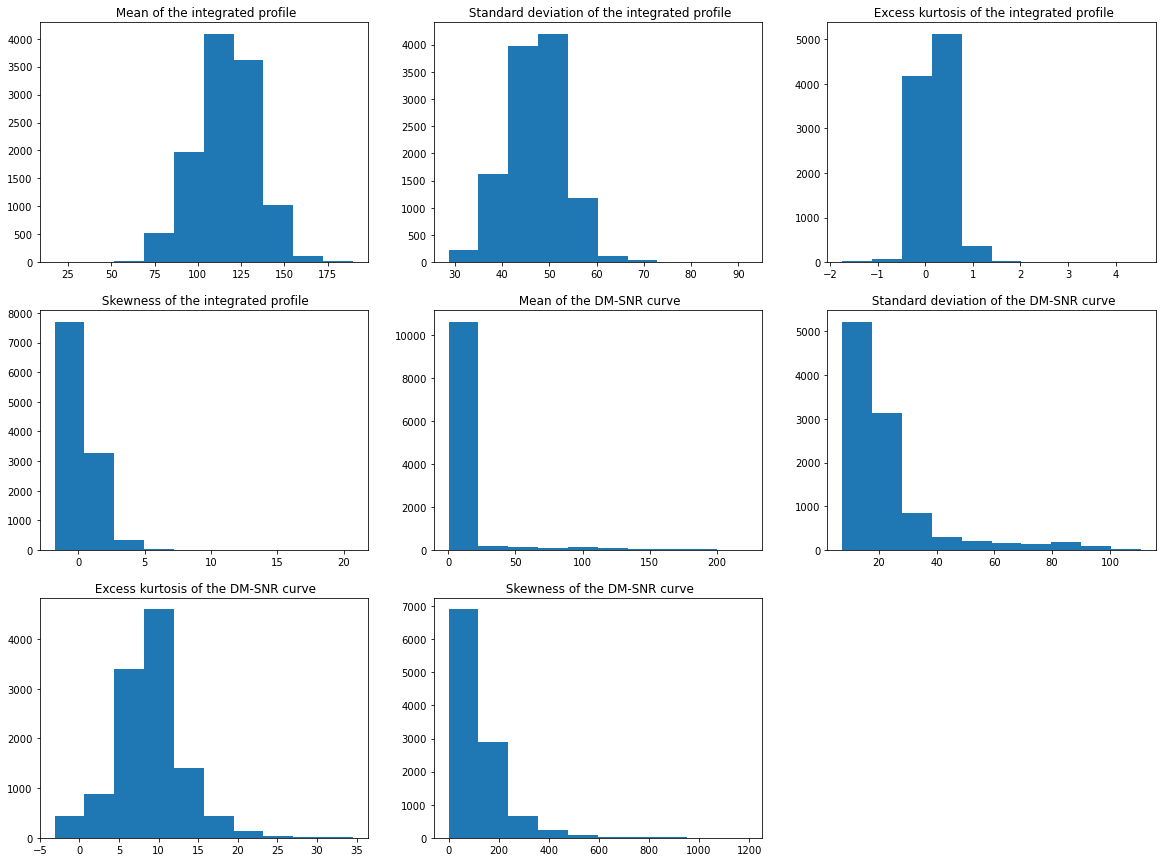

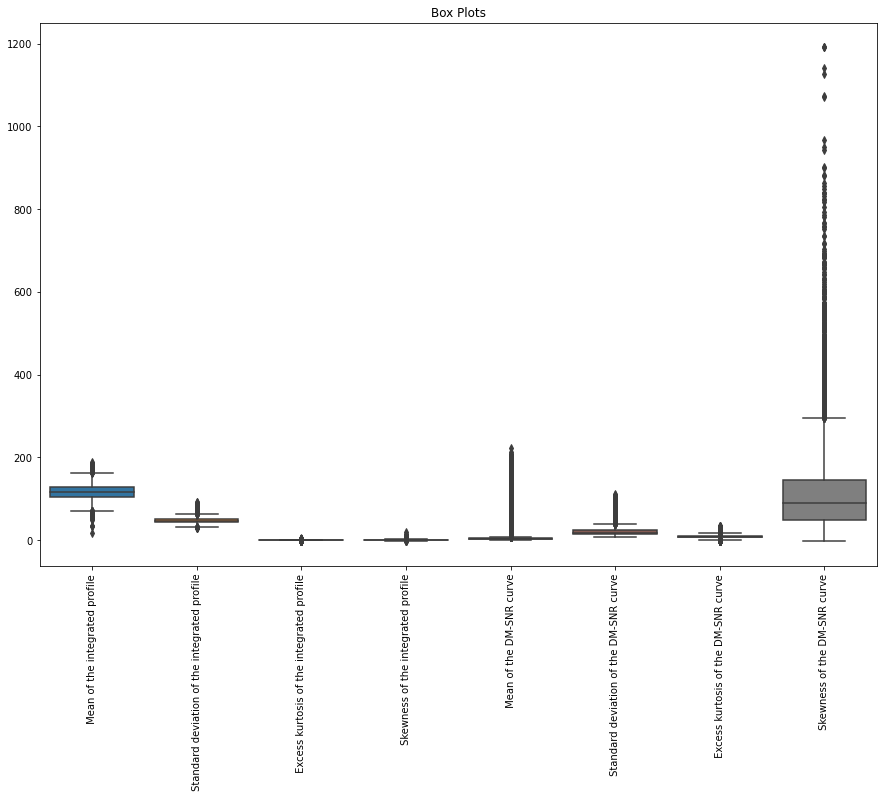

In [10]:
nonpulsar_stats = Spread(not_pulsar)
nonpulsar_stats.sum_stats()
nonpulsar_stats.hist()
nonpulsar_stats.box()

C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


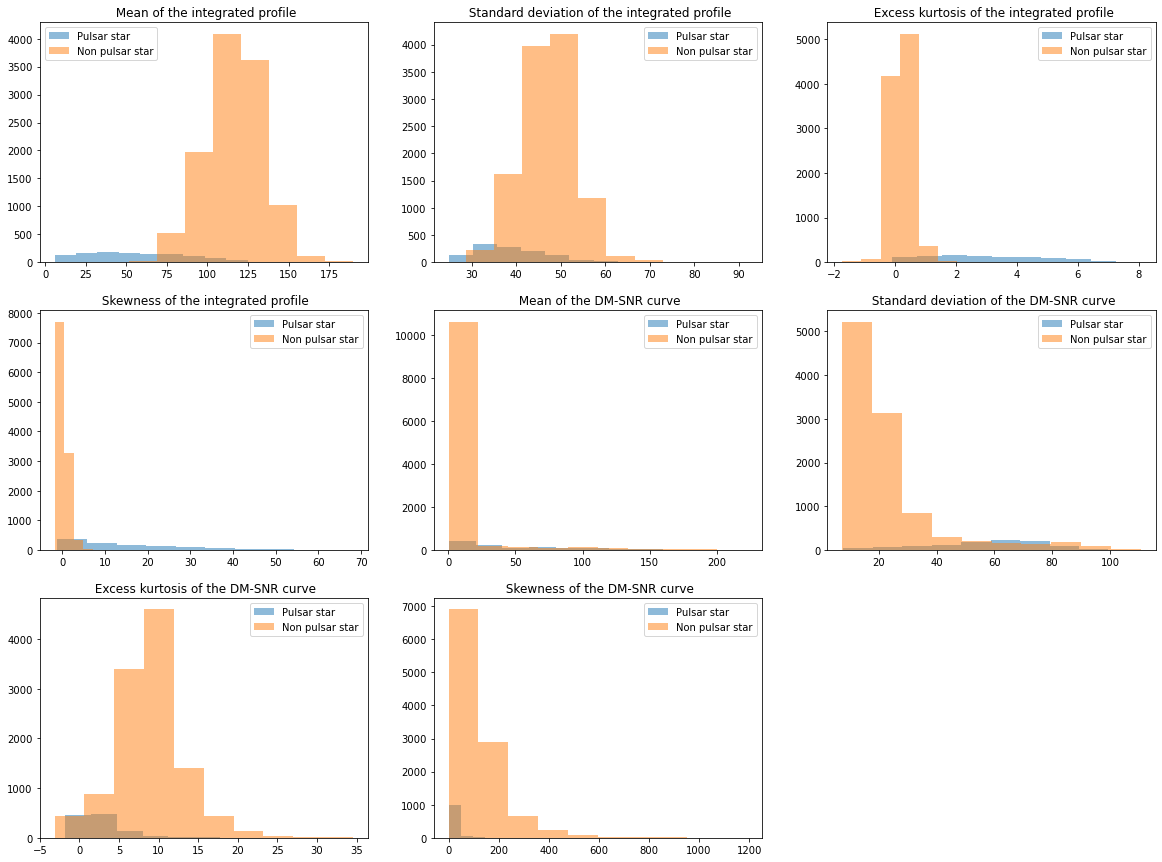

In [11]:
# overlapping histograms
over_hist(pulsar, not_pulsar)

As we can see, all of the variables have a considerable diference between pulsar and non pulsar stars.

To build the prediction model all varaiables will be considered, wich means that only one model of supervised machine learning will be built.

Before building the model there are two important task to be performed, the fullfilment of the missing values, and the normalization of the values.

The last task will allow for a better model, in the sense that will equallize the weight of all the variables.

### Filling the missing values

There are several ways to fill the missing values, but the one that seemed the most adequate for this particular dataset is imputation using k-NN. This method uses machine learning to fill the missing values based on other values with the most similar characteristics.

Although is the best method, it as a disadvantage, it's sensitive to outliers. Considering that the columns with the missing values have outliers, these do not disperse away from the core of the values, allowing for a better result.

In [12]:
#filling missin data with imputation
def fill_miss(dataset, n):
    imputer = KNNImputer(n_neighbors = n)
    imputed = imputer.fit_transform(dataset)
    df = pd.DataFrame(data=imputed, columns=pulsar.columns)
    print(df.isnull().sum())
    return df

#### Pulsar set

In [13]:
pulsar_filled = fill_miss(pulsar, 3)

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


#### Non pulsar set

In [14]:
not_pulsar_filled = fill_miss(not_pulsar, 3)

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


#### Test set

In [15]:
imputer = KNNImputer(n_neighbors = 3)
imputed = imputer.fit_transform(test_set)
test_set_filled = pd.DataFrame(imputed, columns = test_set.columns)
test_set_filled.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64